# Example Notebook 
In this notebook, we demonstrate some of the functionalities of causalfair.

To run this notebook, make sure that you have causalfair.py and the folder "Storage" in the path of this notebook. Storage contains two helper files and is used to store intermediate results.

In [1]:
from causalfair import learn_DAG, draw_ground_truth_graph, draw_problematic_dag, draw_dag, identify_structures, compare_dags
import pandas as pd
import random

Let us first specify a DAG. We do this by specifying which edges exist. Then, we draw the DAG.

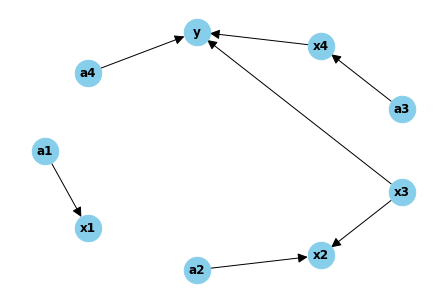

In [2]:
edges = [("a1","x1"),("a2","x2"), ("x3","x2"), ("a3","x4"), ("x4","y"),("x3","y"),("a4","y")]
draw_ground_truth_graph(edges)

Next, we will sample some data, so that we can subsequently try to learn the DAG.

In [3]:
size = 1000
a1 = [random.randint(0, 100) for _ in range(size)]
a2 = [random.randint(0, 100) for _ in range(size)]
a3 = [random.randint(0, 100) for _ in range(size)]
a4 = [random.randint(0, 100) for _ in range(size)]
x3 = [random.randint(0, 100) for _ in range(size)]
x1 = [-2 * elem + random.randint(0, 25) for elem in a1]
x2 = [3 * elem + random.randint(0, 25) for elem in a2]
x2 = [2 * x2_elem - 2*x3_elem + random.randint(0, 50) for x2_elem, x3_elem  in zip(x2, x3)]
x4 = [3 * elem + random.randint(0, 25) for elem in a3]
y = [2 * x3_elem - 2*x4_elem - 2*a4_elem + random.randint(0, 25) for x3_elem, x4_elem, a4_elem in zip(x3, x4, a4)]
data = pd.DataFrame({'a1': a1, 'a2': a2, 'a3': a3, 'a4': a4, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4,'y': y})

Next, we will attempt to learn the DAG from the data. We need to decide:
* method: {PC,HC,LiNGAM}
* dominant_data_type: {continuous, discrete} - this decides which scores are used
* tiers: this is the information we have: We first pass the target, then all regular variables, and the the demographic information. We can also not include any background information.

The method returns the learned adjacency matrix and the set of nodes. 

In [4]:
adjacency_matrix, nodes = learn_DAG(data, method="HC",dominant_data_type="continuous",tiers=[["y"],["x1","x2","x3","x4"],["a1","a2","a3","a4"]])

We can draw the resulting DAG.

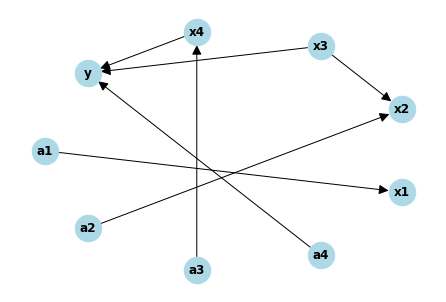

In [5]:
draw_dag((adjacency_matrix, nodes))

And compare it to the ground truth DAG.

In [6]:
comparison = compare_dags((adjacency_matrix, nodes), edges)

Correct Edges: 7
Wrong Edges: 0
Missing Edges: 0


The graph was perfectly learned.

We can also identify problematic structures. For this, we need to submit the adjacency matrix and nodes, as well as the demographic variables and the target. Optionally, if we set draw_problematic to True, it draws the graph highlighting the problematic paths.

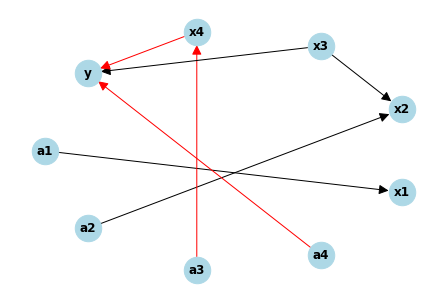

The following variables are likely problematic: ['a3', 'a4'].
They are part of the following paths: [['a3', 'x4', 'y'], ['a4', 'y']].
The following variables are potentially dangerous to remove: [].
They are part of the following paths: [].
The following variables are blocked and unproblematic: ['a2'].
The following variables are not connected and unproblematic: ['a1'].


In [7]:
dag_structure_info = identify_structures(adjacency_matrix, nodes,sensitive_variables=["a1","a2","a3","a4"] ,target_variable="y", draw_problematic=True)

We can assess each of the variables and the problematic structures by calling the returned object and one of the keywords:
- problematic_structures 
- problematic_variables 
- missing_structures 
- missing 
- blocked
- not_connected 

In [8]:
dag_structure_info.problematic_structures

[['a3', 'x4', 'y'], ['a4', 'y']]